In [3]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np

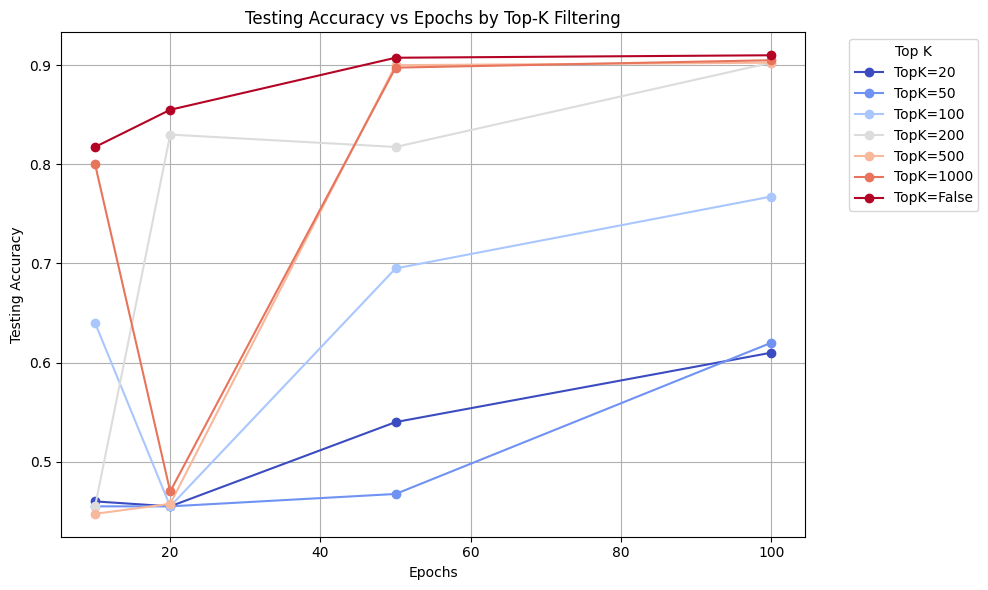

In [4]:
df = pd.read_csv('testing_accuracies.csv')
order = ["20", "50", "100", "200", "500", "1000", "False"]

# Make sure column is string and ordered
order = ["20", "50", "100", "200", "500", "1000", "False"]

# Ensure column is categorical with correct order
df["Top K Filtering"] = df["Top K Filtering"].astype(str)
df["Top K Filtering"] = pd.Categorical(df["Top K Filtering"], categories=order, ordered=True)

# Colormap: smooth gradient
cmap = plt.colormaps.get_cmap("coolwarm")
colors = cmap(np.linspace(0, 1, len(order)))

# Plot
plt.figure(figsize=(10,6))
for i, k in enumerate(order):
    group = df[df["Top K Filtering"] == k]
    if not group.empty:
        plt.plot(group["Epochs"], group["Testing Accuracy"], 
                 marker="o", color=colors[i], label=f"TopK={k}")

plt.xlabel("Epochs")
plt.ylabel("Testing Accuracy")
plt.title("Testing Accuracy vs Epochs by Top-K Filtering")
plt.legend(title="Top K", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()